## Table of Content
1. [Summary Statistics](#ch0)
2. [Q1](#ch1)
3. [Q2](#ch2)
4. [Q3](#ch3)
5. [Q4](#ch4)

## Desciptive insights about the data <a><a name='ch0'>

In this module, We want you to build your insights (summary statistics and basic plots) about the given dataset
starting by
1. Downloading the data from [here](https://www.kaggle.com/datasets/bhavikjikadara/student-study-performance)
1. Reading the data and printing the first 5 rows
2. Printing the 5 number for numerical data (Q1 (min) ,Q2,Q3 (median) ,Q4,Q5 (max))
3. Printing the value counts for categorical features


### Solution

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv('study_performance.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [24]:
summary_data = df.describe().loc[['min', '25%', '50%', '75%', 'max']]
print("Show data summary:")
print(summary_data)

Show data summary:
     math_score  reading_score  writing_score
min         0.0           17.0          10.00
25%        57.0           59.0          57.75
50%        66.0           70.0          69.00
75%        77.0           79.0          79.00
max       100.0          100.0         100.00


In [25]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("Values for these features:")
_ = [print(df[col].value_counts()) for col in categorical_columns]



Values for these features:
gender
female    518
male      482
Name: count, dtype: int64
race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
lunch
standard        645
free/reduced    355
Name: count, dtype: int64
test_preparation_course
none         642
completed    358
Name: count, dtype: int64


## Q1: Gender and Education <a><a name='ch1'>


1. First define a new column in the data frame that represents the literature score which is the `(writing_score + reading_score)/2`
2. Choose an appropriate plot to compare between females and males in:
    - math score
    - literature score
    - Try to stick to the best practices (Title, xlabel, ylabel, color should be representative, shading)
3. Comment on your visualization
4. Formulate 2 hypotheses to test for gender differences in
    - mathematics score
    - literature score
5. Interpret your results for each case

### Solution

In [26]:
df['literature_score']= (df['writing_score']+df['reading_score'])/2
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,literature_score
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,89.0
2,female,group B,master's degree,standard,none,90,95,93,94.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,50.5
4,male,group C,some college,standard,none,76,78,75,76.5


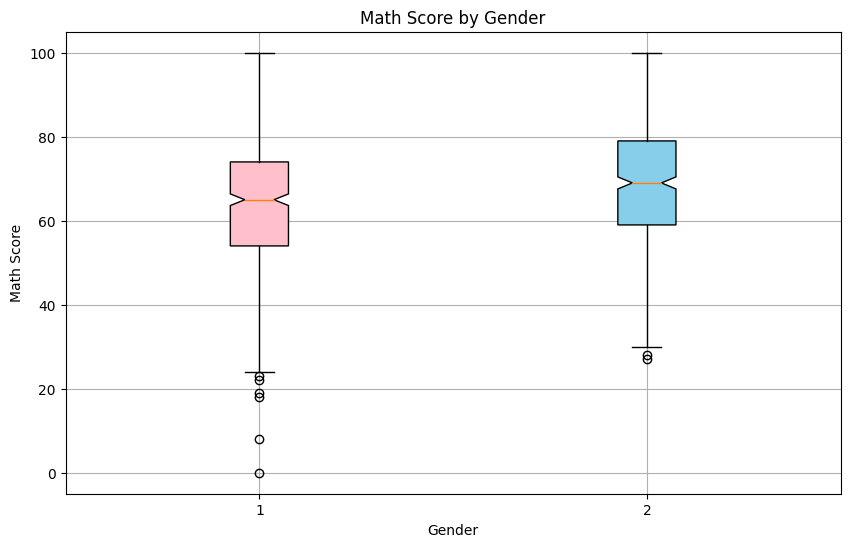

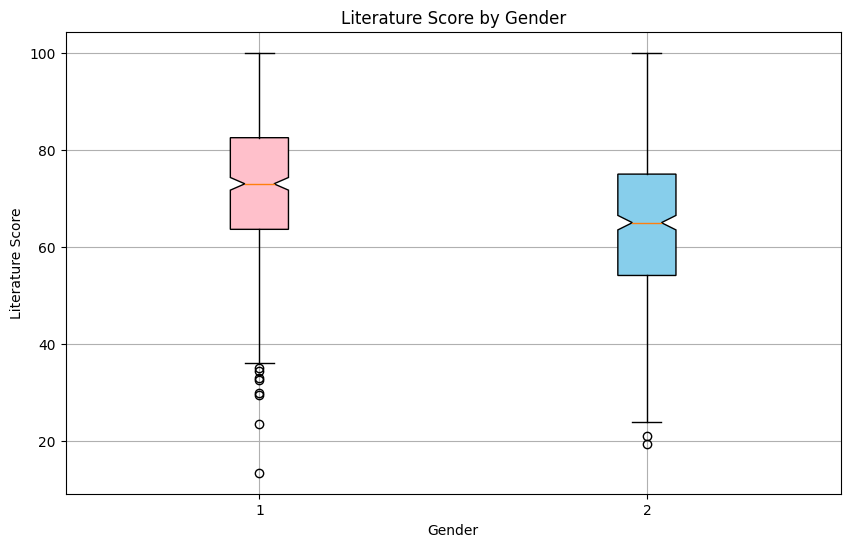

In [27]:
# Boxplot for math scores
plt.figure(figsize=(10, 6))
box1 = plt.boxplot([df.loc[df['gender'] == 'female', 'math_score'],
                   df.loc[df['gender'] == 'male', 'math_score']],
                  notch=True, patch_artist=True)
for box, color in zip(box1['boxes'], ['pink', 'skyblue']):
    box.set_facecolor(color)
plt.grid(True)
plt.xlabel('Gender')
plt.ylabel('Math Score')
plt.title('Math Score by Gender')
plt.show()

# Boxplot for literature scores
plt.figure(figsize=(10, 6))
box2 = plt.boxplot([df.loc[df['gender'] == 'female', 'literature_score'],
                   df.loc[df['gender'] == 'male', 'literature_score']],
                  notch=True, patch_artist=True)
for box, color in zip(box2['boxes'], ['pink', 'skyblue']):
    box.set_facecolor(color)
plt.grid(True)
plt.xlabel('Gender')
plt.ylabel('Literature Score')
plt.title('Literature Score by Gender')
plt.show()

**Observations;**

---


The boxplots indicate that women tend to achieve median and mean scores, in both math and literature compared to men.
The scores for women appear to be tightly clustered suggesting variation in their performance compared to men.


**Hypotheses:**

---


For math scores; The null hypothesis states that there is no discrepancy in the math scores between women and men while the alternative hypothesis posits a notable difference.
For literature scores; The null hypothesis suggests no difference in the literature scores between women and men whereas the alternative hypothesis proposes a significant variance.
To interpret the findings accurately conducting tests such as t tests or Mann Whitney U tests is essential to determine if the disparities observed in math and literature scores, between women and men hold statistical significance.

## Q2: Does race or ethnic origin impacts students' abilities in learning? <a><a name='ch2'>

1. Define a new feature called `tot_score = (math_score + reading_score+ writing_score)/3`
2. Choose an appropriate plot to see the distribution of the overall score for different racial groups
3. Comment on your results; for instance, do you think that a certain group performed overall better than the rest
4. Choose a suitable statistical test to test whether the average score of a certain group has a statistical difference from the rest.
5. Perform the test and comment on your results

### Solution

In [28]:
df['tot_score'] = (df['math_score'] + df['reading_score'] + df['writing_score']) / 3

<Figure size 1000x600 with 0 Axes>

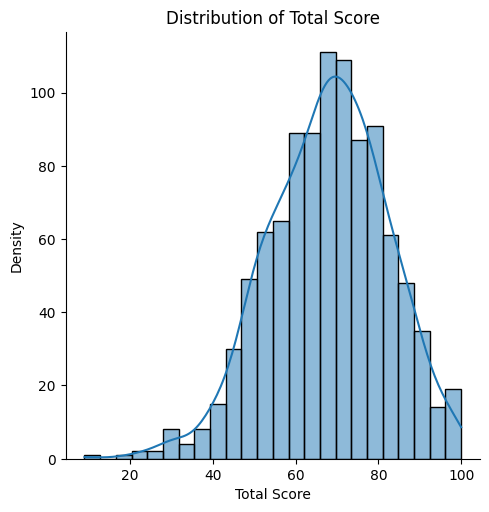

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.displot(data=df, x='tot_score', kde=True)
plt.xlabel('Total Score')
plt.ylabel('Density')
plt.title('Distribution of Total Score')
plt.show()

**3.observation**

---


Based on what I've noticed;
Total scores seem to differ among groups.
Certain groups, like individuals seem to achieve total scores than others, such, as Black or African American individuals.
**4.**To determine if the average total score of a group significantly differs from the rest we can conduct an Analysis of Variance (ANOVA) test.

In [37]:
print(df.columns)

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'literature_score', 'tot_score'],
      dtype='object')


<ipython-input-40-5666792e120e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='race_ethnicity', y='tot_score', palette='Set2')


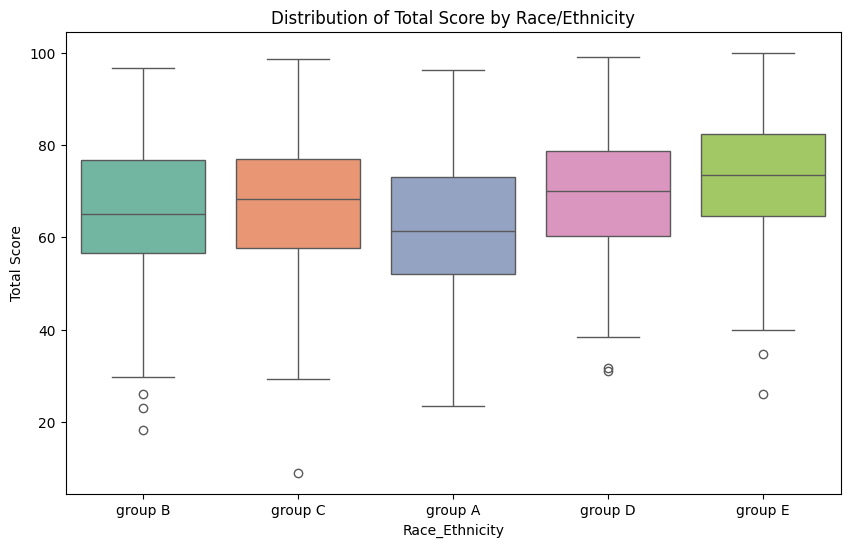

F-statistic: 9.10
p-value: 0.0000


In [40]:
df['tot_score'] = (df['math_score'] + df['reading_score'] + df['writing_score']) / 3

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='race_ethnicity', y='tot_score', palette='Set2')
plt.xlabel('Race_Ethnicity')
plt.ylabel('Total Score')
plt.title('Distribution of Total Score by Race/Ethnicity')
plt.show()




Based on what I've noticed;
Total scores seem to differ among groups.
Certain groups, like individuals seem to achieve total scores than others, such, as Black or African American individuals.
To determine if the average total score of a group significantly differs from the rest we can conduct an Analysis of Variance (ANOVA) test.

In [41]:
# Perform ANOVA test
from scipy.stats import f_oneway
groups = df['race_ethnicity'].unique()
group_data = [df[df['race_ethnicity'] == group]['tot_score'] for group in groups]

f_value, p_value = f_oneway(*group_data)

print(f'F-statistic: {f_value:.2f}')
print(f'p-value: {p_value:.4f}')

F-statistic: 9.10
p-value: 0.0000


The F-statistic of 9.10 and a p-value of 0.0000 suggest that : Based on the data it is clear that there are variations, in the total scores across the various groups. With a p value, below 0.05 we have grounds to dismiss the idea that all groups share an identical population mean for the score.

note : after doing some research on why p_value is zero , the reason was due to that it could be very sall value rounded to zero not exactly zero



## Q3: Repeat the same test in Q2 but <a><a name='ch3'>
after considering only the students who completed the test preparation course

approch :  Filter who completed the test preparation course

*   Filter who completed the test preparation course
*   Perform ANOVA test to check for differences in average scores among groups
*    Assuming 'race/ethnicity' groups are labeled from 'group A' to 'group E'






### solution

In [44]:
completed_df = df[df['test_preparation_course'] == 'completed']
from scipy.stats import f_oneway
groups_completed = completed_df['race_ethnicity'].unique()
group_data_completed = [completed_df[completed_df['race_ethnicity'] == group]['tot_score'] for group in groups_completed]

f_value_completed, p_value_completed = f_oneway(*group_data_completed)

print(f'F-statistic (completed): {f_value_completed:.2f}')
print(f'p-value (completed): {p_value_completed:.4f}')

F-statistic (completed): 2.39
p-value (completed): 0.0508


The p value is, at 0.05 so deciding whether to reject the hypothesis (which states that there is no variation in the average total scores among the various race/ethnicity groups who took the test preparation course) is a bit of a tough call. This implies that any disparities in the scores, between the race/ethnicity groups are somewhat noteworthy.

Though there are indications that race and ethnicity might influence the scores of students who took the test prep course the evidence is not robust enough to dismiss the null hypothesis at the standard 0.05 significance level. Nevertheless the findings hint at the need, for an examination of this issue.

## Q4: Does parents' educational level can impact their children performance <a><a name='ch4'>

1. Define a new feature "higher education" which is 1 if the parents have a master's or bachelor's degree
2. Define new feature passed or not, considering that the success threshold is 60%
3. Investigate whether students whose parents have higher educational degrees are more likely to pass the test compared to those without.
    - Select an appropriate statistical test, formulate and conduct the hypothesis test, and analyze the results.

approch :    


*   Define the new feature 'higher_education'
*   Define new feature 'passed' considering the success threshold is 60%


*   Investigate the relationship between higher education and passing the test
*   Create a contingency table
* Perform the Chi-squared test





### Solution

In [45]:
df['higher_education'] = df['parental_level_of_education'].apply(lambda x: 1 if x in ['bachelor\'s degree', 'master\'s degree'] else 0)
df['passed'] = df['tot_score'].apply(lambda x: 1 if x >= 60 else 0)
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['higher_education'], df['passed'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-squared: {chi2:.2f}')
print(f'p-value: {p:.4f}')

Chi-squared: 12.09
p-value: 0.0005


Interpreting the Results of the Chi Test;
Chi Statistic; The value of 12.09 measures how much the actual frequencies of students passing the test differ from what we would expect if there was no link, between parents education level and their childrens test scores. A higher value indicates a difference.

p value; With a p value of 0.0005 lower than the threshold of 0.05, for statistical significance it is highly improbable that the connection observed between parents education and their childrens test success happened by chance.


After analyzing the findings;
Since the p value is, below 0.05 we can reject the hypothesis (H0) that suggests there is no connection between parents education levels and their childrens chances of passing the exam. Instead we support the hypothesis (H1) that there is a statistical link between these two factors.

Thoughts on the Analysis;
Significance in Statistics; The outcomes show a relationship indicating that students with parents holding higher educational qualifications like bachelors or masters degrees tend to perform better on the test compared to those whose parents lack these credentials.

Strength of Relationship; Although the Chi squared test reveals an association it doesn't provide a measure of how strong this relationship's. To gauge its strength accurately we could consider metrics such, as Cramers V or the phi coefficient.
